In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # Ensures that the display width isn't restricted
pd.set_option('display.max_rows', None)

In [ ]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 0 if x=='normal' else 1)
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,0
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,0
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,1
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,0
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,0


In [ ]:
# # Host count of flags
# df['dsthostserror'] = df['dsthostcount']*df['dsthostserrorrate']
# df['dsthostrerror'] = df['dsthostcount']*df['dsthostrerrorrate']

# # Host srv count of flags
# df['dsthostsrvserror'] = df['dsthostsrvcount']*df['dsthostsrvrerrorrate']
# df['dsthostsrvrerror'] = df['dsthostsrvcount']*df['dsthostsrvserrorrate']

# df['dsthostsamesrv'] = df['dsthostsrvcount']*df['dsthostsamesrvrate']
# df['dsthostdiffsrv'] = df['dsthostsrvcount']*df['dsthostdiffsrvrate']

# # Host count of flags
# df['serror'] = df['count']*df['serrorrate']
# df['rerror'] = df['count']*df['rerrorrate']

# # Host srv count of flags
# df['srvserror'] = df['srvcount']*df['srvrerrorrate']
# df['srvrerror'] = df['srvcount']*df['srvserrorrate']

# df['samesrv'] = df['count']*df['samesrvrate']
# df['diffsrv'] = df['count']*df['diffsrvrate']

In [ ]:
X = df.drop(['attack','is_attack'],axis=1)
y = df['is_attack']

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_columns = ['protocoltype', 'service', 'flag']

encoder = LabelEncoder()
for col in categorical_columns:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

In [ ]:
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9781


In [ ]:
y_test.shape

(25195,)

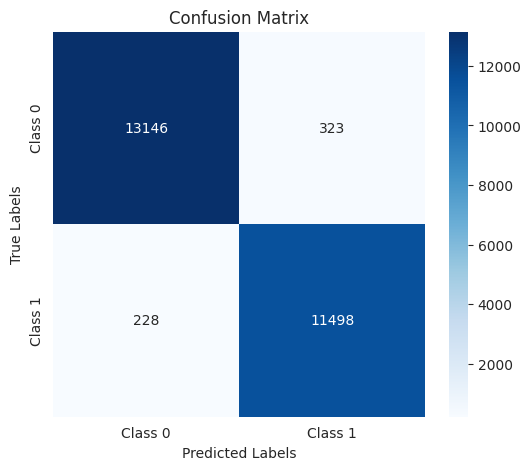

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

              precision    recall  f1-score   support

     Class 0       0.98      0.98      0.98     13469
     Class 1       0.97      0.98      0.98     11726

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195



In [ ]:
(13469*0.98)+(11726*0.98)

24691.1

In [ ]:
24691.1/25195

0.98

In [ ]:
coefficients = model.coef_.flatten()  # Flatten to get a 1D array
features = X.columns

# Combine features and their coefficients into a DataFrame
fdf = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Absolute Coefficient': np.abs(coefficients)
})

In [ ]:
fdf.sort_values('Absolute Coefficient',ascending=False,inplace=True)

In [ ]:
fdf.head(20)

,Feature,Coefficient,Absolute Coefficient
25,srvserrorrate,4.229762,4.229762
22,count,2.430550,2.430550
27,srvrerrorrate,2.355529,2.355529
7,wrongfragment,1.957407,1.957407
41,lastflag,-1.850756,1.850756
24,serrorrate,-1.761214,1.761214
1,protocoltype,-1.614394,1.614394
31,dsthostcount,1.346305,1.346305
28,samesrvrate,-1.295285,1.295285
26,rerrorrate,-1.287371,1.287371


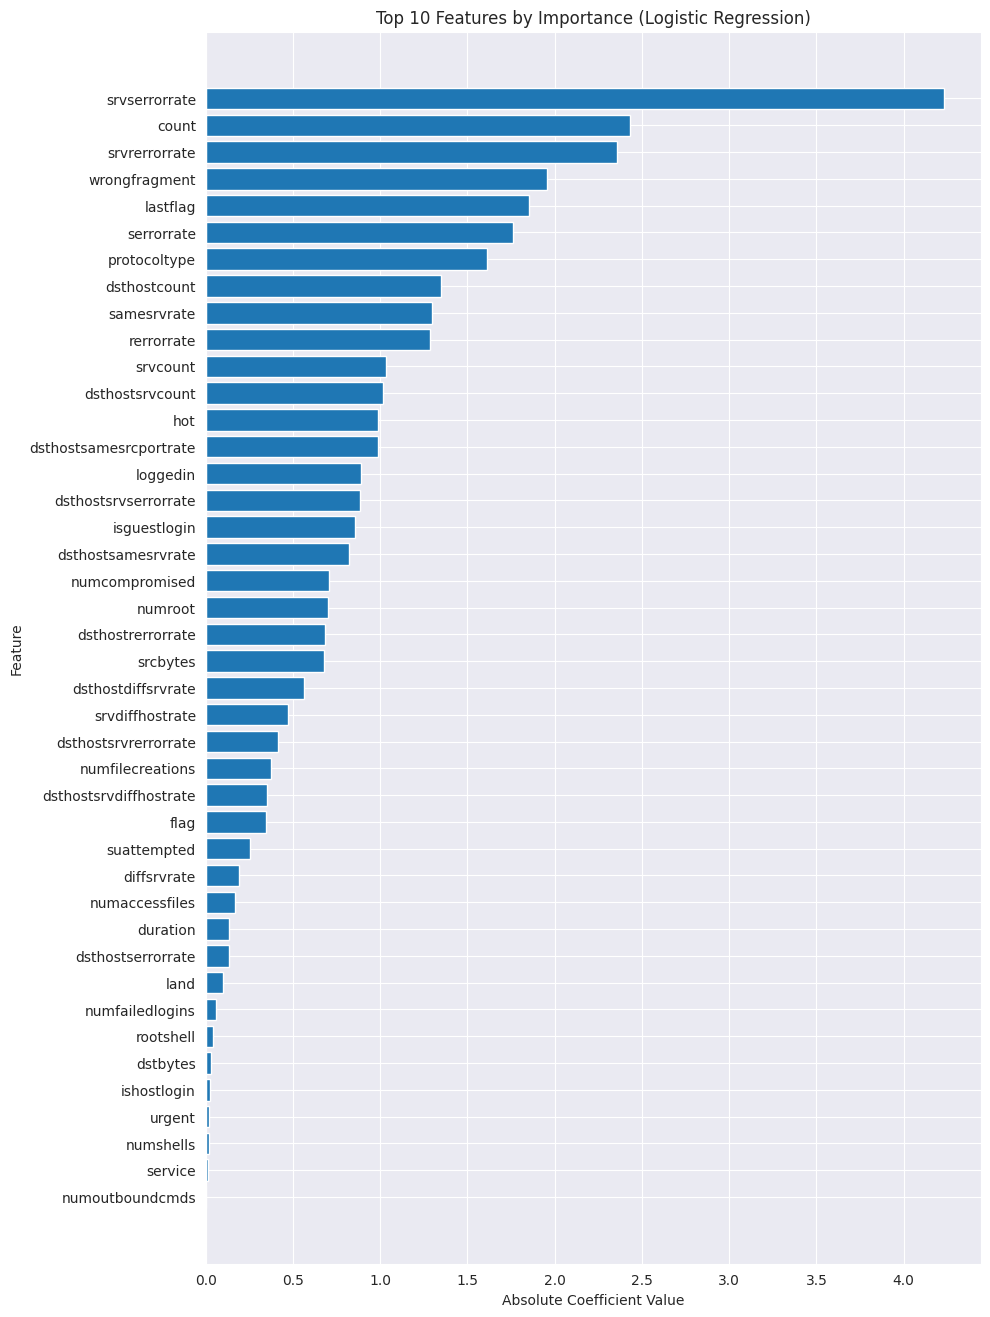

In [ ]:
plt.figure(figsize=(10, 16))
plt.barh(fdf['Feature'], fdf['Absolute Coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 10 Features by Importance (Logistic Regression)')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

In [ ]:
from sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced',random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train,y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_accuracy,test_accuracy

(0.9778920002381473, 0.9775749156578686)

In [ ]:
print(classification_report(y_test, y_test_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13469
           1       0.97      0.98      0.98     11726

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195



In [ ]:
print(classification_report(y_test, y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13469
           1       0.97      0.98      0.98     11726

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195



In [ ]:
feature_importances = rf.feature_importances_
features = X_train.columns  # Assuming your features are stored in a pandas DataFrame
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Step 5: Sort the feature importances in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
importance_df

,Feature,Importance
4,srcbytes,1.456199e-01
5,dstbytes,1.005143e-01
28,samesrvrate,9.318441e-02
41,lastflag,7.370401e-02
29,diffsrvrate,6.701503e-02
33,dsthostsamesrvrate,6.154372e-02
3,flag,5.771198e-02
11,loggedin,5.224976e-02
22,count,4.850443e-02
32,dsthostsrvcount,3.937691e-02


In [ ]:
op_final = pd.merge(fdf,importance_df,on='Feature')

In [ ]:
f1 = op_final.sort_values('Absolute Coefficient',ascending=False)['Feature'].head(10)
f2 = op_final.sort_values('Importance',ascending=False)['Feature'].head(10)
set(f2).intersection(set(f1))

{'count', 'dsthostsrvcount', 'lastflag', 'samesrvrate'}